In [40]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline



In [41]:
df = pd.read_csv('train-data.csv')

In [42]:
df.head()

,Unnamed: 0,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price
0,0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.6 km/kg,998 CC,58.16 bhp,5.0,NaN,1.75
1,1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67 kmpl,1582 CC,126.2 bhp,5.0,NaN,12.50
2,2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.2 kmpl,1199 CC,88.7 bhp,5.0,8.61 Lakh,4.50
3,3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77 kmpl,1248 CC,88.76 bhp,7.0,NaN,6.00
4,4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.2 kmpl,1968 CC,140.8 bhp,5.0,NaN,17.74


In [43]:
df['Owner_Type'].unique()

array(['First', 'Second', 'Fourth & Above', 'Third'], dtype=object)

In [44]:
df['Owner_Type'].replace({'First' : 1, 'Second' : 2,'Third' : 3, 'Fourth & Above' :4},inplace = True)

In [45]:
df['Owner_Type'].unique()

array([1, 2, 4, 3], dtype=int64)

In [46]:
df.isnull().sum()

Unnamed: 0              0
Name                    0
Location                0
Year                    0
Kilometers_Driven       0
Fuel_Type               0
Transmission            0
Owner_Type              0
Mileage                 2
Engine                 36
Power                  36
Seats                  42
New_Price            5195
Price                   0
dtype: int64

In [47]:
df = df.drop(['New_Price','Unnamed: 0', 'Name', 'Location'],axis = 1)

In [48]:
df.dropna(axis = 0, inplace=True)

In [49]:
df.isnull().sum()

Year                 0
Kilometers_Driven    0
Fuel_Type            0
Transmission         0
Owner_Type           0
Mileage              0
Engine               0
Power                0
Seats                0
Price                0
dtype: int64

In [50]:
df.dtypes

Year                   int64
Kilometers_Driven      int64
Fuel_Type             object
Transmission          object
Owner_Type             int64
Mileage               object
Engine                object
Power                 object
Seats                float64
Price                float64
dtype: object

Here we are seeing that Mileage,Engine and Power are object type and specific units are also presented in the dataset,that's why before fitting into model we have to perform some preprocessing. 

Before doing analysis let's do some preprocessing of some features

In [51]:
df['Engine'] = df['Engine'].str.split().str[0]
df['Power'] = df['Power'].str.split().str[0]
#df['Engine'] = df['Engine'].apply(lambda x: (x.split(' ')[0]))

Let's have the only Company name from the name column.

In [52]:
#df['Name'] = df['Name'].str.split().str[0]

In [53]:
#Let's convert km/kg tito kmpl because most of the data point are kmpl
Correct_Mileage = []

for i in df.Mileage:
    if str(i).endswith('km/kg'):
        i = i[:-6]
        i = float(i)*1.40
        Correct_Mileage.append(float(i))
        
    elif str(i).endswith('kmpl'):
        i = i[:-6]
        Correct_Mileage.append(float(i))

In [54]:
len(Correct_Mileage)

5975

In [55]:
df['Mileage'] = Correct_Mileage

In [56]:
df.head(5)

,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price
0,2010,72000,CNG,Manual,1,37.24,998,58.16,5.0,1.75
1,2015,41000,Diesel,Manual,1,19.60,1582,126.2,5.0,12.50
2,2011,46000,Petrol,Manual,1,18.00,1199,88.7,5.0,4.50
3,2012,87000,Diesel,Manual,1,20.70,1248,88.76,7.0,6.00
4,2013,40670,Diesel,Automatic,2,15.00,1968,140.8,5.0,17.74


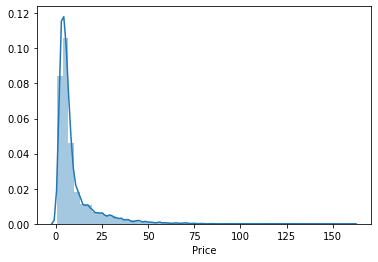

In [57]:
#First have the Price distribution
sns.distplot(df['Price'])

In [58]:
#Let's have the Company frequency
plt.figure(figsize = [15,10])
sns.countplot(y =  'Name',data = df)
plt.title("Most frequent Company")

ValueError: Could not interpret input 'Name'

<Figure size 1080x720 with 0 Axes>

Here we are seeing that Maruti,Hyundai and honda are the most frequent company.

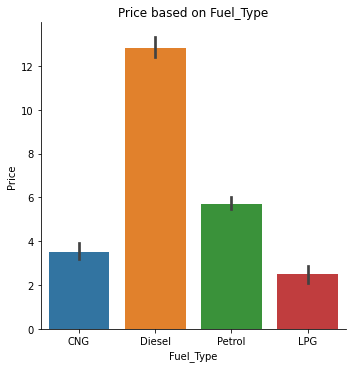

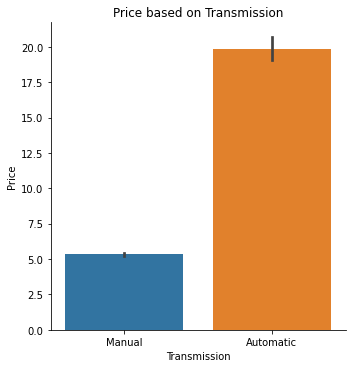

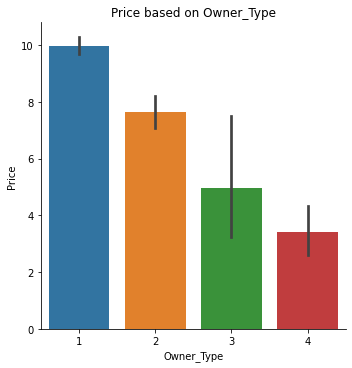

In [59]:
#First let's see how our target variable is dependent on  individual Categorical features

features = df[['Fuel_Type','Transmission','Owner_Type']].columns
for i in features:
    sns.catplot(x = i , y = 'Price',kind = 'bar',data = df)
    plt.title("Price based on " + i)
    plt.show()

Let's have the relationship pairwise.

Text(0.5, 1.0, 'Counting transamission based on owner type')

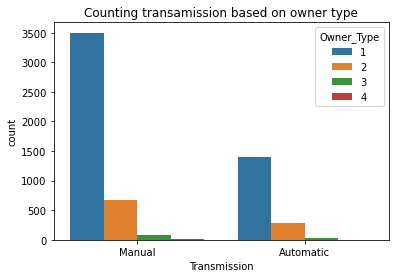

In [60]:
sns.countplot(x = 'Transmission', hue ='Owner_Type', data = df )
plt.title('Counting transamission based on owner type')

Text(0.5, 1.0, 'Counting transamission based on Fuel type')

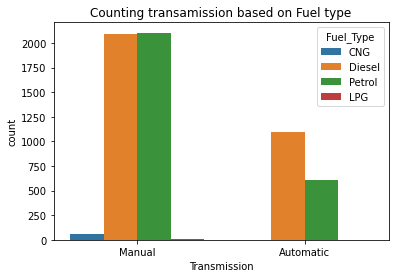

In [61]:
sns.countplot(x = 'Transmission', hue ='Fuel_Type', data = df )
plt.title('Counting transamission based on Fuel type')

Text(0.5, 1.0, 'Counting Fuel_type based on owner type')

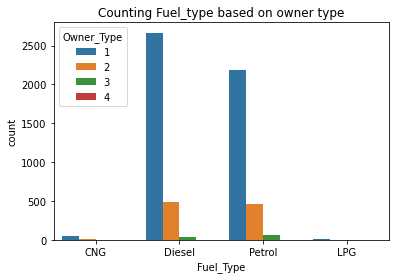

In [62]:
sns.countplot(x = 'Fuel_Type', hue ='Owner_Type', data = df )
plt.title('Counting Fuel_type based on owner type')

Text(0.5, 1.0, 'kilometer driven')

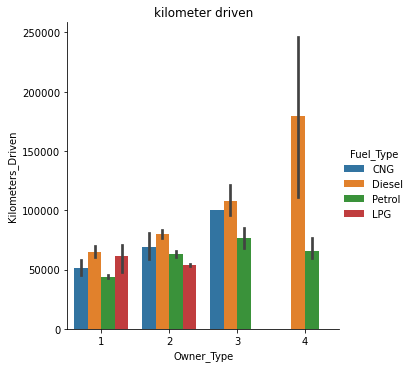

In [63]:
#Let's have the relationship between kilometer driven and Owner type
sns.catplot(x = 'Owner_Type', y = 'Kilometers_Driven',hue = 'Fuel_Type',kind = 'bar', data = df)
plt.title('kilometer driven')

# Feature Engineering

In [64]:
df.head()

,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price
0,2010,72000,CNG,Manual,1,37.24,998,58.16,5.0,1.75
1,2015,41000,Diesel,Manual,1,19.60,1582,126.2,5.0,12.50
2,2011,46000,Petrol,Manual,1,18.00,1199,88.7,5.0,4.50
3,2012,87000,Diesel,Manual,1,20.70,1248,88.76,7.0,6.00
4,2013,40670,Diesel,Automatic,2,15.00,1968,140.8,5.0,17.74


In [65]:
df = pd.get_dummies(data = df, columns =['Fuel_Type', 'Transmission'] , drop_first= True)

In [66]:
df.head()

,Year,Kilometers_Driven,Owner_Type,Mileage,Engine,Power,Seats,Price,Fuel_Type_Diesel,Fuel_Type_LPG,Fuel_Type_Petrol,Transmission_Manual
0,2010,72000,1,37.24,998,58.16,5.0,1.75,0,0,0,1
1,2015,41000,1,19.60,1582,126.2,5.0,12.50,1,0,0,1
2,2011,46000,1,18.00,1199,88.7,5.0,4.50,0,0,1,1
3,2012,87000,1,20.70,1248,88.76,7.0,6.00,1,0,0,1
4,2013,40670,2,15.00,1968,140.8,5.0,17.74,1,0,0,0


In [67]:
df[pd.to_numeric(df.Power, errors = 'coerce').isnull()]

,Year,Kilometers_Driven,Owner_Type,Mileage,Engine,Power,Seats,Price,Fuel_Type_Diesel,Fuel_Type_LPG,Fuel_Type_Petrol,Transmission_Manual
76,2008,111111,1,17.0,1399,null,5.0,2.00,1,0,0,1
79,2005,87591,1,0.0,1086,null,5.0,1.30,0,0,1,1
89,2007,73745,1,17.0,1086,null,5.0,2.10,0,0,1,1
120,2005,102000,2,17.0,1086,null,5.0,0.85,0,0,1,1
143,2008,80759,3,17.0,1086,null,5.0,1.67,0,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...
5861,2007,79000,1,17.0,1086,null,5.0,1.85,0,0,1,1
5873,2006,47200,2,17.0,1086,null,5.0,1.20,0,0,1,1
5925,2010,85000,1,17.0,1798,null,5.0,2.85,0,0,1,1
5943,2002,75000,1,0.0,2112,null,6.0,1.70,1,0,0,1


In [68]:
df =df[df.Power != 'null']

In [69]:
df.shape

(5872, 12)

In [70]:
df.head()

,Year,Kilometers_Driven,Owner_Type,Mileage,Engine,Power,Seats,Price,Fuel_Type_Diesel,Fuel_Type_LPG,Fuel_Type_Petrol,Transmission_Manual
0,2010,72000,1,37.24,998,58.16,5.0,1.75,0,0,0,1
1,2015,41000,1,19.60,1582,126.2,5.0,12.50,1,0,0,1
2,2011,46000,1,18.00,1199,88.7,5.0,4.50,0,0,1,1
3,2012,87000,1,20.70,1248,88.76,7.0,6.00,1,0,0,1
4,2013,40670,2,15.00,1968,140.8,5.0,17.74,1,0,0,0


In [71]:
df['Year'] = 2021 - df['Year']

In [72]:
df.head()

,Year,Kilometers_Driven,Owner_Type,Mileage,Engine,Power,Seats,Price,Fuel_Type_Diesel,Fuel_Type_LPG,Fuel_Type_Petrol,Transmission_Manual
0,11,72000,1,37.24,998,58.16,5.0,1.75,0,0,0,1
1,6,41000,1,19.60,1582,126.2,5.0,12.50,1,0,0,1
2,10,46000,1,18.00,1199,88.7,5.0,4.50,0,0,1,1
3,9,87000,1,20.70,1248,88.76,7.0,6.00,1,0,0,1
4,8,40670,2,15.00,1968,140.8,5.0,17.74,1,0,0,0


In [73]:
X = df.drop(['Price'], axis = 1)
y = df['Price']

In [74]:
from sklearn.ensemble import ExtraTreesRegressor
model = ExtraTreesRegressor()
model.fit(X,y)

ExtraTreesRegressor()

In [75]:
print(model.feature_importances_)

[1.60813654e-01 3.72811840e-02 6.97694964e-03 3.30903548e-02
 1.05332088e-01 2.67647256e-01 3.97399986e-02 6.05202427e-02
 1.05287919e-06 4.39838588e-03 2.84198834e-01]


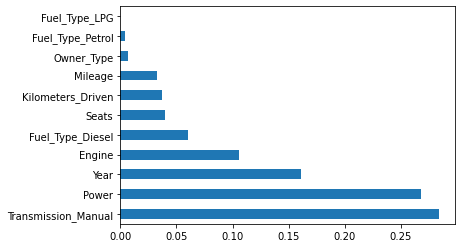

In [76]:
feat_importance = pd.Series(model.feature_importances_,index = X.columns)
feat_importance.nlargest(11).plot(kind = 'barh')
plt.show()

In [77]:
from sklearn.model_selection import train_test_split

In [78]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [79]:
X_train.dtypes

Year                     int64
Kilometers_Driven        int64
Owner_Type               int64
Mileage                float64
Engine                  object
Power                   object
Seats                  float64
Fuel_Type_Diesel         uint8
Fuel_Type_LPG            uint8
Fuel_Type_Petrol         uint8
Transmission_Manual      uint8
dtype: object

In [80]:
from sklearn.linear_model import LinearRegression

In [81]:
lr = LinearRegression()
lr.fit(X_train,y_train)

LinearRegression()

In [82]:
y_pred = lr.predict(X_test)

In [83]:
mse = np.mean((y_pred - y_test)**2)
print('Mean Squared Error on test data: ', + mse)

Mean Squared Error on test data:  34.196941376135136


In [84]:
#Putting together the coefficients and their corresponding variable name
lr_coef = pd.DataFrame()
lr_coef['Columns'] = X_train.columns
lr_coef['Coefficient'] = pd.Series(lr.coef_)
print(lr_coef)

                Columns  Coefficient
0                  Year    -1.071665
1     Kilometers_Driven     0.000002
2            Owner_Type    -0.011343
3               Mileage    -0.228590
4                Engine     0.000699
5                 Power     0.127118
6                 Seats    -1.203257
7      Fuel_Type_Diesel    -3.073169
8         Fuel_Type_LPG     1.586056
9      Fuel_Type_Petrol    -5.782165
10  Transmission_Manual    -2.561152


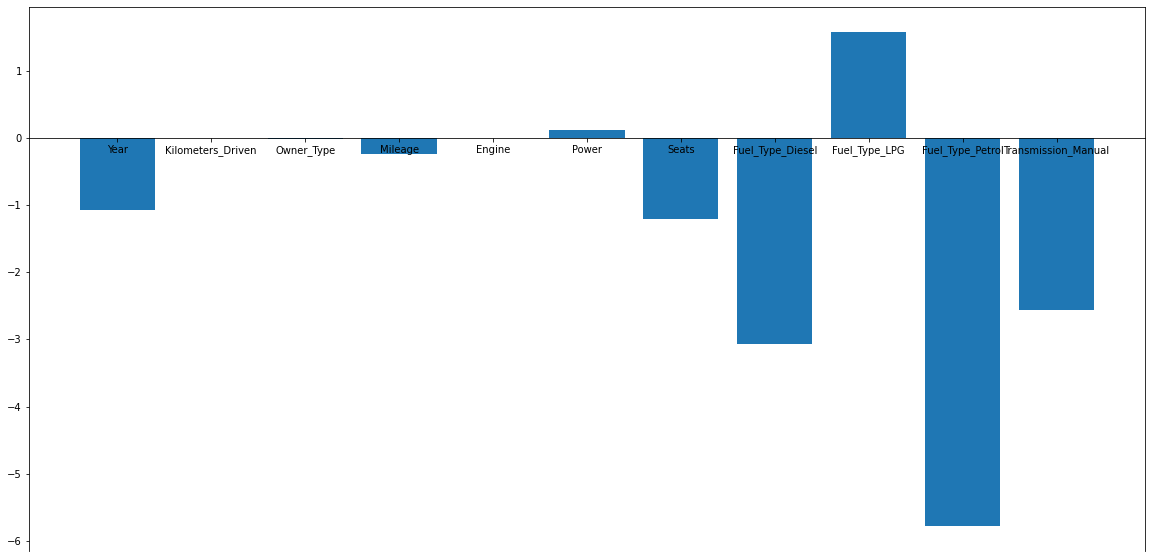

In [85]:
fig, ax = plt.subplots(figsize = (20,10))
ax.bar(lr_coef['Columns'], lr_coef['Coefficient'])

ax.spines['bottom'].set_position('zero')
#plt.style.use('ggplot')
plt.show()

In [86]:
#Import ridge regression from sklearn.
from sklearn.linear_model import Ridge

ridgeR = Ridge(alpha = 1)
ridgeR.fit(X_train,y_train)
y_pred = ridgeR.predict(X_test)
mse = np.mean((y_pred - y_test)**2)
print('Mean Squared Error on test data: ', + mse)

Mean Squared Error on test data:  34.188852707462196


In [87]:
#Putting together the coefficients and their corresponding variable name
ridgeR_coef = pd.DataFrame()
ridgeR_coef['Columns'] = X_train.columns
ridgeR_coef['Coefficient'] = pd.Series(lr.coef_)
print(ridgeR_coef)

                Columns  Coefficient
0                  Year    -1.071665
1     Kilometers_Driven     0.000002
2            Owner_Type    -0.011343
3               Mileage    -0.228590
4                Engine     0.000699
5                 Power     0.127118
6                 Seats    -1.203257
7      Fuel_Type_Diesel    -3.073169
8         Fuel_Type_LPG     1.586056
9      Fuel_Type_Petrol    -5.782165
10  Transmission_Manual    -2.561152


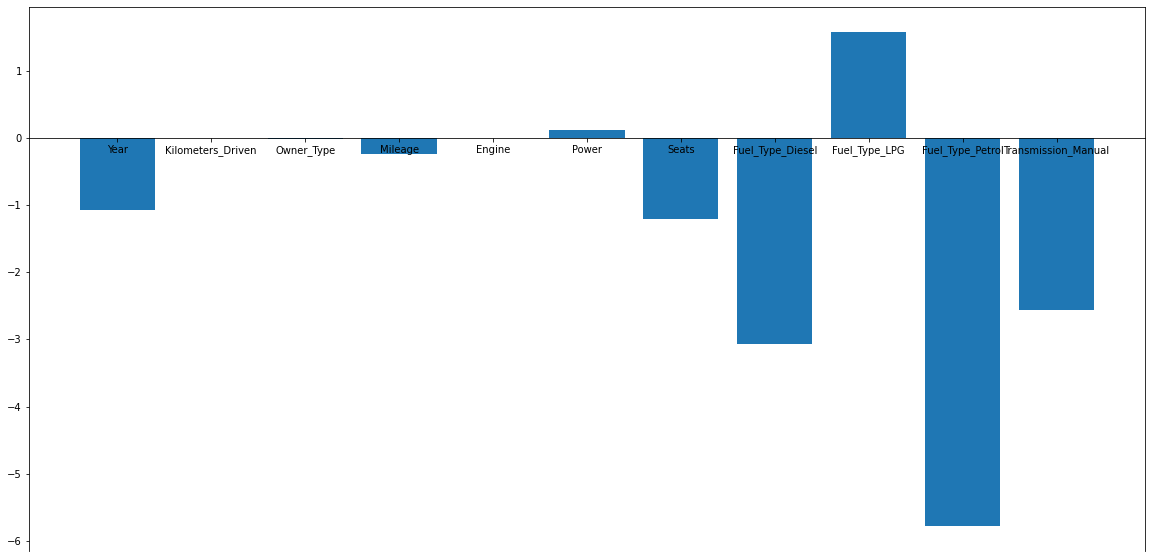

In [88]:
fig, ax = plt.subplots(figsize = (20,10))
ax.bar(ridgeR_coef['Columns'], ridgeR_coef['Coefficient'])

ax.spines['bottom'].set_position('zero')
#plt.style.use('ggplot')
plt.show()

# KNN

In [89]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import cross_val_predict
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold

In [90]:
cv = KFold(n_splits = 6, random_state = 0, shuffle = False)

C:\Users\Sudhakor Das\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:293: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  warnings.warn(


In [91]:
classifier_pipeline = make_pipeline(StandardScaler(),KNeighborsRegressor(n_neighbors=1)) 
y_pred = cross_val_predict(classifier_pipeline, X,y, cv = 5)
print(y_pred)

[ 2.25 11.9   4.06 ...  5.5   3.02  2.4 ]


In [92]:
knn = KNeighborsRegressor(n_neighbors=1)
knn.fit(X_train,y_train)
y_pred = knn.predict(X_test)

# Evaluations

In [93]:
from sklearn.metrics import mean_squared_error

In [94]:
print('Mean Squared Error is', mean_squared_error(y_test, y_pred))

Mean Squared Error is 84.59374340425533


Let's try different k value

In [95]:
Error = []

for i in range(1, 51):
    knn = KNeighborsRegressor(n_neighbors=i)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    Error.append(mean_squared_error(y_test,y_pred))

Text(0, 0.5, 'Error Rate')

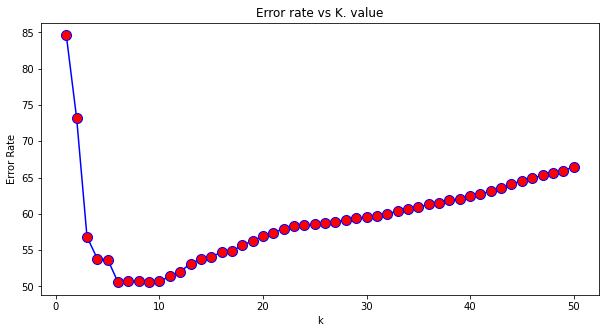

In [96]:
plt.figure(figsize=(10,5))
plt.plot(range(1,51), Error, color = 'blue', marker = 'o', markerfacecolor = 'red', markersize = 10)

plt.title('Error rate vs K. value')
plt.xlabel('k')
plt.ylabel('Error Rate')

# AdaBoast Regressor

In [97]:
from sklearn.ensemble import AdaBoostRegressor
AdaR = AdaBoostRegressor(base_estimator = None, n_estimators= 50, learning_rate= 1, random_state=2)
AdaR.fit(X_train, y_train)

AdaBoostRegressor(learning_rate=1, random_state=2)

In [98]:
y_pred = AdaR.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print(mse)

44.36075624039375


In [99]:
Error = []

for i in range(1, 101):
    AdaR = AdaBoostRegressor(base_estimator = None, n_estimators= i, learning_rate= 1, random_state=2)
    AdaR.fit(X_train, y_train)
    y_pred = AdaR.predict(X_test)
    Error.append(mean_squared_error(y_test,y_pred))

Text(0, 0.5, 'Error Rate')

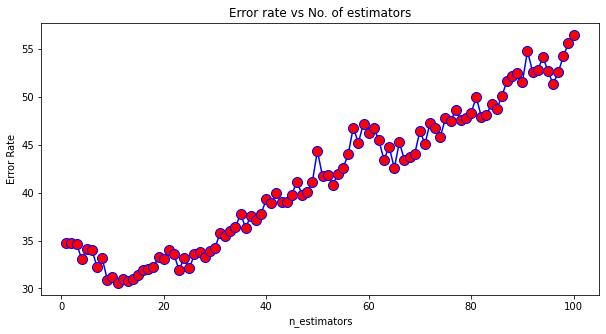

In [100]:
plt.figure(figsize=(10,5))
plt.plot(range(1,101), Error, color = 'blue', marker = 'o', markerfacecolor = 'red', markersize = 10)

plt.title('Error rate vs No. of estimators')
plt.xlabel('n_estimators')
plt.ylabel('Error Rate')

# Gredient Boasting

In [101]:
from sklearn.ensemble import GradientBoostingRegressor
gredR = GradientBoostingRegressor(max_depth = 2, n_estimators = 4, learning_rate = 1.0)

In [102]:
gredR.fit(X_train, y_train)
y_pred = gredR.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print(mse)

28.624028152676804


# Let's tune the hyperparameters

In [103]:
from sklearn.model_selection import GridSearchCV
LR = {'learning_rate': [0.15, .1, .12, 0.05], 'n_estimators' : [50, 100, 150, 200, 250]}

tuning = GridSearchCV(estimator=GradientBoostingRegressor(),
                           param_grid=LR, scoring ='r2')
tuning.fit(X_train, y_train)



GridSearchCV(estimator=GradientBoostingRegressor(),
             param_grid={'learning_rate': [0.15, 0.1, 0.12, 0.05],
                         'n_estimators': [50, 100, 150, 200, 250]},
             scoring='r2')

In [104]:
tuning.best_params_, tuning.best_score_

({'learning_rate': 0.15, 'n_estimators': 250}, 0.8924484446821255)

In [105]:
y_pred = tuning.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print(mse)

16.82104354209463


In [106]:
Gred = GradientBoostingRegressor(max_depth = 8, n_estimators = 250, learning_rate = .15)
Gred.fit(X_train, y_train)
y_pred = Gred.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print(mse)

13.332428972277281


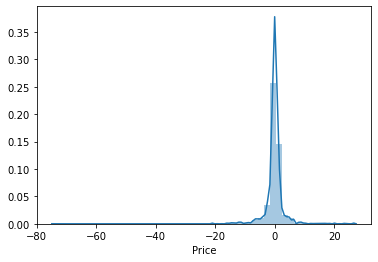

In [107]:
sns.distplot(y_test - y_pred)

In [108]:
import pickle
file = open('Car Price Prediction.pkl', 'wb')

pickle.dump(Gred, file)

In [81]:
import xgboost as xgb

In [84]:
model = xgb.XGBRegressor(objective='reg:squarederror')


XGBRegressor(base_score=None, booster=None, colsample_bylevel=None,
             colsample_bynode=None, colsample_bytree=None, gamma=None,
             gpu_id=None, importance_type='gain', interaction_constraints=None,
             learning_rate=None, max_delta_step=None, max_depth=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=100, n_jobs=None, num_parallel_tree=None,
             random_state=None, reg_alpha=None, reg_lambda=None,
             scale_pos_weight=None, subsample=None, tree_method=None,
             validate_parameters=None, verbosity=None)

In [85]:

from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import mean_squared_error
from xgboost import XGBRegressor


In [88]:
X_train['Engine'] = X_train['Engine'].astype('int64')

In [68]:
X_train['Seats'] = X_train['Seats'].astype('float')

In [69]:
X_train['Power'] = X_train['Power'].astype('float')

In [73]:
X_test['Engine'] = X_test['Engine'].astype('int64')

In [74]:
X_test['Power'] = X_test['Power'].astype('float')

In [92]:
xg_reg = xgb.XGBRegressor(objective ='reg:squarederror', colsample_bytree = 0.3, learning_rate = 0.1,
                max_depth = 5, alpha = 10, n_estimators = 10)

In [93]:
xg_reg.fit(X_train, y_train)

XGBRegressor(alpha=10, base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=0.3, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.1, max_delta_step=0, max_depth=5,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=10, n_jobs=4, num_parallel_tree=1, random_state=0,
             reg_alpha=10, reg_lambda=1, scale_pos_weight=1, subsample=1,
             tree_method='exact', validate_parameters=1, verbosity=None)

In [94]:
y_pred = xg_reg.predict(X_test)

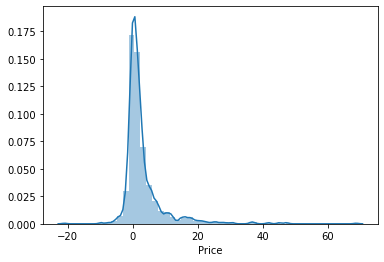

In [95]:
sns.distplot(y_test-y_pred)

In [87]:
params = {
        'learning_rate': [.05, .10, .15, .20, .25, .40, .50, .80, .6, .90],
        'n_estimators' : [100, 200, 250, 350, 400,500,600],
        'min_child_weight': [1, 5, 10],
        'gamma': [0.5, 1, 1.5, 2, 5],
        'subsample': [0.6, 0.8, 1.0],
        'colsample_bytree': [0.6, 0.8, 1.0],
        'max_depth': [3, 4, 5,7, 8, 10, 12]
        }

In [98]:
model = XGBRegressor(objective='reg:squarederror')

In [112]:
folds = 10
param_comb = 5

skf = StratifiedKFold(n_splits=folds, shuffle = True)

random_search = RandomizedSearchCV(model, param_distributions=params, n_iter=param_comb, n_jobs=-1, cv=10, verbose=3, random_state=1001 )




In [113]:
random_search.fit(X_train, y_train)

Fitting 10 folds for each of 5 candidates, totalling 50 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  24 tasks      | elapsed:   11.6s
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:   46.7s finished


RandomizedSearchCV(cv=10,
                   estimator=XGBRegressor(base_score=None, booster=None,
                                          colsample_bylevel=None,
                                          colsample_bynode=None,
                                          colsample_bytree=None, gamma=None,
                                          gpu_id=None, importance_type='gain',
                                          interaction_constraints=None,
                                          learning_rate=None,
                                          max_delta_step=None, max_depth=None,
                                          min_child_weight=None, missing=nan,
                                          monotone_constraints=None,
                                          n_estimators=100,...
                                          validate_parameters=None,
                                          verbosity=None),
                   n_iter=5, n_jobs=-1,
                   param

In [114]:
random_search.best_estimator_

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1.0, gamma=1, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.25, max_delta_step=0, max_depth=5,
             min_child_weight=10, missing=nan, monotone_constraints='()',
             n_estimators=200, n_jobs=4, num_parallel_tree=1, random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=0.8,
             tree_method='exact', validate_parameters=1, verbosity=None)

In [118]:
results = pd.DataFrame(random_search.cv_results_)

In [123]:
model = XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1.0, gamma=1, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.25, max_delta_step=0, max_depth=5,
             min_child_weight=10, monotone_constraints='()',
             n_estimators=200, n_jobs=4, num_parallel_tree=1, random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=0.8,
             tree_method='exact', validate_parameters=1, verbosity=None)


In [124]:
model.fit(X_train, y_train)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1.0, gamma=1, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.25, max_delta_step=0, max_depth=5,
             min_child_weight=10, missing=nan, monotone_constraints='()',
             n_estimators=200, n_jobs=4, num_parallel_tree=1, random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=0.8,
             tree_method='exact', validate_parameters=1, verbosity=None)

In [125]:
y_pred = model.predict(X_test)

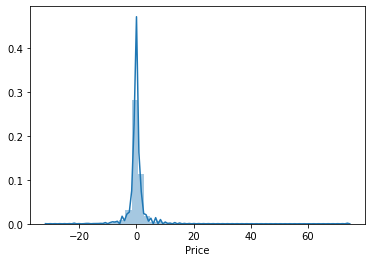

In [126]:
sns.distplot(y_pred - y_test)

In [127]:
mse = mean_squared_error(y_test, y_pred)
print(mse)

11.758637153827653


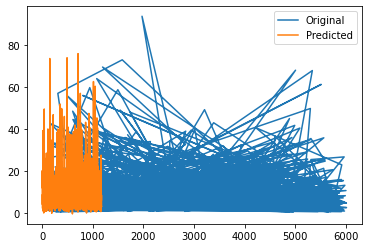

In [128]:
plt.plot(y_test, label = 'Original')
plt.plot(y_pred, label = 'Predicted')
plt.legend()
plt.show()